<a href="https://colab.research.google.com/github/cancan-lab/Notebook-DM2/blob/main/164221112_Rayya_Andina_Nathania_Praktikum_Text_Mining_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Percobaan**

## **1. NLTK**

### **Tokenisasi, perintah string.split() dapat dilakukan, atau menggunakanNLTK**

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import nltk

text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

**Interpretasi**

Output di atas nunjukin kalau `word_tokenize` berhasil mecah teks jadi **23 token**. Kata dan tanda baca dipisah rapi, jadi titik (`.`) berdiri sebagai token sendiri. Kata yang pakai tanda hubung (-) seperti right-hand tetap dianggap satu token. Huruf besar/kecil juga tidak diubah (misal **“In”**, **“Brazil”**, **“South”**, **“America”** masih kapital). Kata umum seperti **“the”**, **“of”**, **“on”**, **“a”** masih muncul karena belum menghapus stopwords. Nama tempat **“South America”** terpisah jadi dua token (**“South”** dan **“America”**). Urutan tokennya juga bukan per kalimat, terlihat dari **“road”**, lalu **“.”**, lalu **“has”** yang langsung nyambung tanpa dipisah dulu.


### **Mencari frekuensi kata, dapat menggunakan fungsi FreqDist dari NLTK**

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

**Interpretasi**

Output `FreqDist` menunjukkan seberapa sering setiap token muncul pada teks. Pada hasil ini, **“the”** menjadi token paling sering (3 kali), disusul **“on”**, **“side”**, dan **“of”** yang masing-masing muncul **2 kali**. Token lain seperti **“In”**, **“Brazil”**, **“they”**, **“drive”**, **“right-hand”**, **“road”**, **“has”**, **“a”**, **“large”**, **“coastline”**, **“eastern”**, **“South”**, dan **“America”** muncul **1 kali**. Karena perhitungan ini **case-sensitive**, sehingga **“In”** (huruf awal kapital) dianggap berbeda dari “in”. Secara umum, kata-kata fungsi (stopwords) seperti **“the”**, **“of”**, dan **“on”** memang mendominasi frekuensi karena sifatnya yang sering muncul di banyak kalimat.


### **Method most_common untuk mencari beberapa kata denganfrekuensi tertinggi dalam korpus**

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1


[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

**Interpretasi**

Hasil `most_common(10)` menampilkan sepuluh token dengan frekuensi tertinggi beserta jumlah kemunculannya. Pada data ini, **“the”** menempati posisi pertama dengan **3** kemunculan. Tiga token berikutnya yaitu **“on”**, **“side”**, dan **“of”**, masing-masing muncul **2** kali. Enam token sisanya, yaitu **“In”**, **“Brazil”**, **“they”**, **“drive”**, **“right-hand”**, dan **“road”**, masing-masing muncul **1** kali. Karena hasilnya **case-sensitive**, sehingga **“In”** (huruf awal kapital) dianggap berbeda dari “in”. Secara umum, output ini menunjukkan bahwa kata fungsional (stopwords) seperti **“the”**, **“on”**, dan **“of”** cenderung mendominasi daftar frekuensi tertinggi.


<Axes: xlabel='Key'>

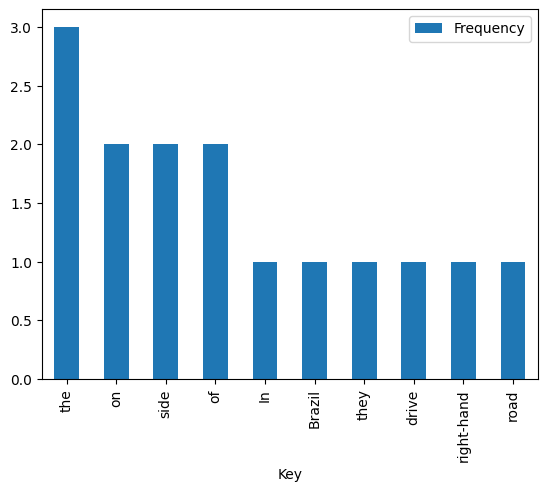

In [ ]:
import pandas as pd
from nltk.probability import FreqDist

fdist = FreqDist(token) # Assuming 'token' is available
freqdist1 = fdist.most_common(10) # Define freqdist1 here

# Convert the list of tuples to a dictionary
freq_dict = dict(freqdist1)

df_freq_tokens = pd.DataFrame.from_dict(freq_dict, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

**Interpretasi**

Grafik batang menampilkan **10 token dengan frekuensi tertinggi** pada korpus. Terlihat **“the”** memiliki batang paling tinggi (**3 kali**), disusul **“on”**, **“side”**, dan **“of”** yang masing-masing muncul **2 kali**. Enam token lainnya yaitu **“In”**, **“Brazil”**, **“they”**, **“drive”**, **“right-hand”**, dan **“road”**—muncul **1 kali**. Sumbu-X menunjukkan nama token (Key) dan sumbu-Y menunjukkan jumlah kemunculan (Frequency). Pola ini menegaskan bahwa **kata fungsional** seperti “the”, “of”, dan “on” mendominasi daftar, sementara token bernilai informasi seperti nama tempat atau kata kerja cenderung jarang. Perhitungannya juga **case-sensitive**, sehingga **“In”** (kapital) diperlakukan sebagai token yang berbeda.


### **Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."

text1 = word_tokenize(text.lower())

print(text1)
stopwords_tokens = [x for x in text1 if x not in a]
print(stopwords_tokens)


['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


**Interpretasi**

Output pertama (`text1`) menampilkan hasil tokenisasi setelah seluruh teks diubah ke huruf kecil seperti kata isi seperti *cristiano*, *ronaldo*, *born*, serta informasi waktu (*february*, *5*, *1985*) dan lokasi (*funchal*, *madeira*, *portugal*) muncul bersama tanda baca (`,` dan `.`). Setelah penyaringan menggunakan daftar **stopwords** bahasa Inggris dari NLTK, output kedua (`stopwords_tokens`) menghapus kata fungsional yang umum seperti **was**, **on**, dan **in**, sehingga yang tersisa adalah kata-kata bermakna: *cristiano*, *ronaldo*, *born*, *february*, *5*, *1985*, *funchal*, *madeira*, *portugal*. Karena penyaringan hanya membandingkan token dengan daftar stopwords, **angka dan tanda baca tetap ada**, untuk menghilangkannya bisa melakukan pembersihan tambahan (misalnya menggunakan regex). Lowercasing dilakukan agar pencocokan dengan stopwords konsisten.


### **Stemming**

Salah satu pra pemrosesan teks. Yaitu mengubah sebuah kata menjadi bentuk dasarny

In [ ]:
# Contoh Stemming di NLTK
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to MultiPly my provision, saying tHat without crYing'
print('Sentence: ', S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster', 'Porter', 'SnowBall']
for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == 'SnowBall':
        st = stem('english')
    else:
        st = stem()
        print(stemmer_name, ': ', ' '.join(st.stem(s) for s in S.split()))

# perhatikan, kita tidak melakukan case normalization (lowercase)
# Hasil stemming bisa tidak bermakna


Sentence:  presumably I would like to MultiPly my provision, saying tHat without crYing
Lancaster :  presum i would lik to multiply my provision, say that without cry
Porter :  presum i would like to multipli my provision, say that without cri


**Interpretasi**

Output memperlihatkan stemming pada kalimat yang sama dengan dua algoritma: **Lancaster** (lebih agresif) dan **Porter** (lebih konservatif). Keduanya mengubah kata ke bentuk dasar, misalnya **“presumably” → “presum”** (keduanya); **“crying”** menjadi **“cry”** (Lancaster) vs **“cri”** (Porter); **“like”** dipotong **“lik”** (Lancaster) namun tetap **“like”** di Porter; **“multiply”** tetap utuh di Lancaster tetapi menjadi **“multipli”** di Porter. Tanda baca tidak dibersihkan (contoh **“provision,”** masih berkomma). Intinya, stemming bisa menghasilkan bentuk dasar, tetapi tetap berguna untuk menormalkan variasi kata sebelum pemodelan teks.


### **Lemmatization**

proses yang lebih kompleks dari stemming, karenameliputi perubahan bentuk kata ke bentuk dasarnya. Contoh: “going”, “went”, “gone”memiliki output yang sama ketika dilakukan lemmatisasi yakni “go”

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))


rocks : rock
corpora : corpus


**Interpretasi**

Output menunjukkan bahwa **lemmatizer WordNet** mengubah kata ke **bentuk dasar (lemma)**. Kata **“rocks”** dikembalikan menjadi **“rock”** (jamak → tunggal), dan **“corpora”** menjadi **“corpus”** (jamak tidak beraturan). Hal ini terjadi karena lemmatizer merujuk ke kamus WordNet (default dianggap sebagai **noun**), sehingga hasilnya berupa kata kamus yang valid. Jadi lemmatization menormalkan variasi morfologis agar fitur teks lebih konsisten dibanding pemotongan kasar pada stemming.


**Pos Tagging**

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
# Contoh POS tags dengan NLTK (bahasa Inggris)
from nltk import pos_tag
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesian language too'

tokens = word_tokenize(S)
print(pos_tag(tokens))
# Tidak lagi hanya 9 macam tags seperti yang dibahas ahli bahasa (linguist)


[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


**Interpretasi**

Output ini menampilkan **POS tagging** NLTK, yaitu tiap token diberi label kelas kata. Contohnya: **“I”→PRP** (pronoun), **“am/want”→VBP** (verb present), **“learning”→VBG** (verb -ing), **“currently/too”→RB** (adverb), **“possible/Indonesian”→JJ** (adjective), **“know”→VB** (base verb), **“language”→NN** (noun), **“NLP/English”→NNP** (proper noun), **“in/if”→IN** (preposisi/konjungsi), **“but”→CC**, **“to”→TO**, dan koma tetap sebagai token **','**. Tag yang rinci ini membantu analisis struktur kalimat dan tahap lanjutan seperti lemmatization berbasis POS, chunking, atau penyaringan kata.


## **2. TextBlob (Text Binary large Object)**

### **Tokenisasi**

In [ ]:
# Contoh tokenisasi dengan TextBlob
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled!! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

# Tokenisasi kata
print(TextBlob(T).words)

# Tokenisasi kalimat
print([str(sent) for sent in sentence_tokens])


['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


**Interpretasi**

Output menunjukkan TextBlob men-tokenisasi kata dengan menghapus tanda baca seperti “Hello,” → “Hello”, “Mr.” → “Mr”, “smiled!!” → “smiled”, sementara singkatan “i.e.” tetap satu token. Untuk kalimat, dihasilkan empat kalimat: “Hello, Mr. Man.”, “He smiled!!”, “This, i.e.”, dan “that, is it.”. Jadi, TextBlob efektif membersihkan tanda baca pada level kata, namun batas kalimatnya sensitif terhadap singkatan.


### **Stemming dan Lemmatization**

In [ ]:
# Contoh TextBlob Stemming & Lemmatizer
from textblob import Word
# Stemming
print("Stem: ", Word('running').stem())

# Lemmatizer
print("Lemmatize: ", Word('went').lemmatize('v'))

# default Noun, plural akan menjadi singular dari akar katanya
# Juga case sensitive


Stem:  run
Lemmatize:  go


**Interpretasi**

Output ini menunjukkan: **stemming** mengubah *“running”* menjadi **“run”** lewat pemotongan akhiran secara otomatis, sedangkan **lemmatization** mengubah *“went”* (dengan jenis kata verba `'v'`) menjadi **“go”** karena merujuk kamus dan bentuk dasar. Jika **jenis kata** tidak ditentukan, TextBlob biasanya menganggap **noun**, sehingga hasil bisa berbeda atau tidak berubah. Jadi, stemming lebih cepat namun kurang halus, sementara lemmatization lebih bermakna karena memakai kamus dan kelas kata.


### **Pos tagging**

In [ ]:
# Contoh POS tag dengan TextBlob pada bahasa Inggris
for word, pos in TextBlob(T).tags:
    print(word, pos, end=', ')


Hello NNP, Mr. NNP, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

**Interpretasi**

Output ini menampilkan **POS tagging** TextBlob: tiap token diberi label kelas kata. **“Hello”**, **“Mr.”**, dan **“Man”** ditandai **NNP** (proper noun) karena penggunaan huruf besar pada awal kata; **“He”** dan **“it”** **PRP** (pronoun); **“smiled”** **VBD** (verb lampau); **“is”** **VBZ** (verb present orang ketiga tunggal); **“This”** dan **“that”** **DT** (determiner). Singkatan **“i.e”** terbaca **NN** (noun), menunjukkan keterbatasan pada penanganan singkatan.

## **3. Sastrawi**

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis"
stop = stopword.remove(kalimat.lower())
print(stop)


andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis


**Interpretasi**

Output memperlihatkan Sastrawi menghapus **stopwords** setelah teks diubah ke huruf kecil. Kata fungsi seperti **“secara”**, **“atau”**, dan **“menurut”** hilang, sementara kata bermakna tetap ada sehingga hasilnya menjadi **“andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis”**. Tanda titik tetap dipertahankan dan teks jadi lebih ringkas dan fokus, meski masih ada kemiripan makna berdampingan (**“daring online”**).

### **Stemming dan lemma**

In [ ]:
# Lemmatizer dengan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))
# Ada beberapa hal yang berbeda antara Sastrawi dan modul-modul diatas.
# Apa sajakah?


raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


**Interpretasi**

Output menunjukkan Sastrawi melakukan **stemming** pada teks bahasa Indonesia dengan memotong awalan/akhiran agar kata kembali ke bentuk lebih dasar. Contohnya: **“perayaan”→“raya”**, **“berbarengan”→“bareng”**, **“bepergian”→“pergi”**, dan **“menyuarakan”→“suara”**; seluruh kata juga diubah ke huruf kecil (misal **“Makassar”→“makassar”**). Kalimat hasilnya menjadi lebih ringkas: **“raya itu bareng dengan saat kita pergi ke makassar”** dan **“raya pergi suara”**.

### **Wordcloud**

salah satu cara visualisasi deskriptif pada data teks, sifatnya miripdengan barplot frekuensi namun semakin besar frekuensi kata tersebut, semakin besarukuran kata tersebut dalam wordcloud

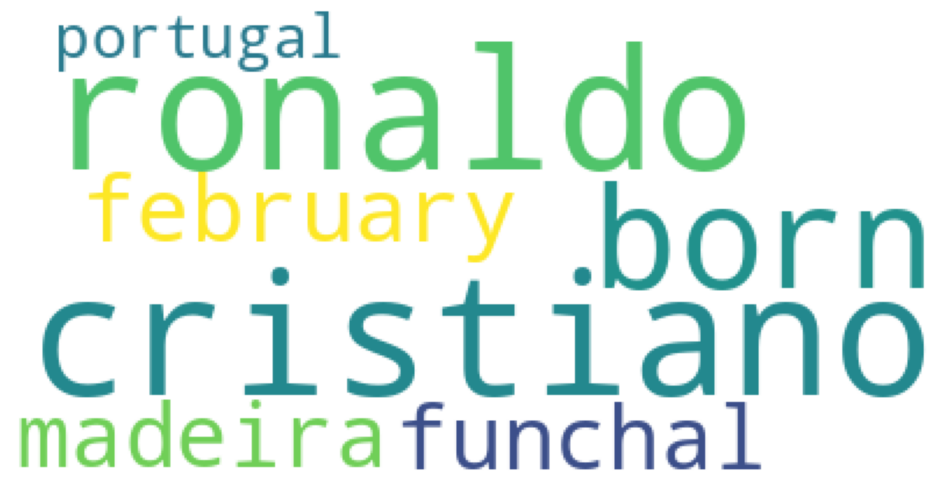

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Assuming 'stopwords_tokens' is defined from a previous cell and is a list of tokens
# Join the list of tokens into a single string
text_for_wordcloud = " ".join(stopwords_tokens)

wordcloud = WordCloud(background_color="white").generate(text_for_wordcloud)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

**Interpretasi**

Wordcloud menonjolkan kata paling sering setelah stopwords dihapus: **“ronaldo”** dan **“cristiano”** paling besar (frekuensi tertinggi), diikuti **“born”**, **“february”**, **“madeira”**, **“funchal”**, dan **“portugal”** yang lebih kecil. Munculnya **“.born”** menunjukkan masih ada tanda baca yang ikut terbawa, jadi pembersihan belum sepenuhnya tuntas. Angka **“5”** dan **“1985”** tidak terlihat, kemungkinan terfilter atau terlalu jarang. Secara umum, visual ini menunjukkan fokus isi pada tokoh, waktu kelahiran, dan lokasi.


## **4. Clustering**

### **K-Means**

In [ ]:
import pickle
import os
import re
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

src_name = "/content/20newsgroup.pckl"
src_path = os.path.join("data", src_name)
with open(src_path, 'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() # tokenisasi kalimat
    sents = [t for t in sents if t not in stop_words]
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) # menghapus simbol
        s = re.sub(' +', ' ', s) # menghapus repetitive space
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

print('DONE!')


DONE!


In [ ]:
# representasi vektor dengan VSM–TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)
k = 3
seed = 99  # Sembarang nilai untuk Random generator, agar hasil bisa direproduksi
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
C_km[:10]


(1653, 10697)


array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

**Interpretasi**

Output menunjukkan TF-IDF membentuk matriks **(1653, 10697)**: **1653 dokumen** × **10.697 fitur** setelah preprocessing (lowercase, hapus stopwords/simbol) dan filter `max_df=0.95`–`min_df=2`. **K-Means (k=3)** berhasil dijalankan dan memberi label untuk tiap dokumen; contoh 10 pertama: **\[0, 1, 0, 1, 1, 0, 1, 1, 1, 1]**. Angka **0/1/2** hanya penanda kelompok, bukan peringkat, dan `random_state=99` membuat hasilnya bisa diulang. Intinya, dokumen sudah direpresentasikan dengan TF-IDF lalu dikelompokkan menjadi **3 topik** berdasarkan kemiripan kata.

### **Kmeans++**

In [ ]:
# k-means++ clustering
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state=seed)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)
C_kmpp[:10]


array([2, 2, 2, 1, 2, 2, 1, 1, 2, 1], dtype=int32)

**Interpretasi**

Output k-means++ menampilkan label klaster untuk **10 dokumen pertama**: **\[2, 2, 2, 1, 2, 2, 1, 1, 2, 1]**. Angka **0/1/2** hanya **ID klaster**, bukan peringkat kualitas. Perbedaan penugasan terjadi karena k-means++ memakai **inisialisasi pusat yang lebih baik (menyebar)** sehingga hasil biasanya lebih stabil; dengan `random_state=99`, pembagian ini bisa diulang dengan hasil yang sama.


### **DB Scan**

In [ ]:
# DBSCAN
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
import numpy as np

dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

**Interpretasi**

Output DBSCAN memberi **label −1** pada 10 dokumen pertama, artinya semua dokumen tersebut dianggap **noise** (tidak masuk klaster). Ini menunjukkan dengan parameter saat ini (`eps=0.5` pada representasi TF-IDF) algoritma **belum menemukan kepadatan data yang cukup** untuk membentuk klaster. Jadi, DBSCAN **belum menghasilkan klaster** pada data ini, hal ini dapat terjadi pada data teks berdimensi tinggi ketika `eps` terlalu kecil atau metrik jarak kurang sesuai.


### **Evaluasi Clustering**

#### **Evaluasi Internal**

##### **Silhouette coefficient**

Salah satu contoh Evaluasi Internal yaitu Silhouette coefficient yang menghitungkemiripan data point dengan cluster tempat data point tsb berada dibandingkan dengancluster tetangga. Range nilai [-1, +1]. Semakin tinggi nilainya menunjukkan semakinbaik cluster yang terbentuk.

In [ ]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]

for res in C:
    print(siluet(X, res), end=', ')

# NOTE: Silhouette coefficient hanya cocok untuk k–means


0.016981615567284915, 0.013605182832831979, -0.23697524589624636, 

**Interpretasi**

Nilai silhouette berturut-turut **0,0169** (K-Means), **0,0136** (k-means++), dan **−0,2370** (DBSCAN). Karena skala **−1 s.d. 1** dan makin **tinggi** makin baik, dua nilai yang mendekati **0** menandakan pemisahan klaster **sangat lemah** pada K-Means/k-means++. Nilai **negatif** pada DBSCAN menunjukkan pemetaan **buruk** (banyak sampel lebih dekat ke klaster lain).

#### **Evaluasi Eksternal**

##### **Purity**

Menghitung jumlah data point yangbenar dalam suatu cluster. Untuk menggunakan evaluasi ini, membutuhkan label datadari ground truth.

In [ ]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(label, res), end=', ')


0.2500029197546111, 0.1027322184051205, 0.0015549989772357536, 

**Interpretasi**

Purity (homogeneity) masing-masing **0,2500** untuk K-Means, **0,1027** untuk k-means++, dan **0,0016** untuk DBSCAN (skala 0–1, makin tinggi makin baik kecocokan dengan label asli). Jadi, K-Means paling baik di antara tiga metode, tetapi nilainya tetap **rendah** sehingga pemetaan ke kelas asli masih lemah; k-means++ lebih rendah lagi, dan DBSCAN hampir nol, kemungkinan karena banyak titik dianggap **noise (−1)**.


##### **Evaluasi menggunakan NMI**

In [ ]:
# Evaluasi eksternal NMI
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
    print(NMI(label, res), end=', ')


0.3112369523534145, 0.11893244458208735, 0.002704356633566744, 

**Interpretasi**

Nilai NMI berturut-turut 0,3112 (K-Means), 0,1189 (k-means++), dan 0,0027 (DBSCAN). Dengan skala 0–1 (semakin tinggi semakin baik kesesuaian dengan label asli), K-Means memberi kecocokan terbaik di antara tiga metode namun masih moderat–rendah; k-means++ lemah, dan DBSCAN nyaris nol (kemungkinan banyak sampel berlabel noise −1 atau parameter belum sesuai).

# **2) Perbedaan hasil NLTK, TextBlob dan Sastrawi dan contohnya**

1. NLTK (Inggris) = Hasil tokennya memisahkan kata dan tanda baca (misal road terpisah dari .), kata bertanda hubung tetap satu token (right-hand), dan peka terhadap huruf besar. Stopwords Inggris terhapus, tetapi angka atau tanda baca bisa masih ikut jika tidak dibersihkan lagi. Stemming kadang kurang halus (contoh crying bisa jadi cri atau cry), sedangkan lemmatization mengembalikan ke bentuk kamus (misal corpora → corpus). Penandaan jenis kata (POS) tersedia dan cukup detail.

2. TextBlob (Inggris) = Token kata dibersihkan dari tanda baca (Mr. menjadi Mr), namun pemisahan kalimat sensitif pada singkatan (misal i.e. bisa dianggap akhir kalimat). Stemming dan lemmatization (misal running → run, went → go jika jenis katanya diatur sebagai verba), dan hasil penandaan jenis kata mirip NLTK.

3. Sastrawi (Indonesia) = Stopwords bahasa Indonesia dihapus sehingga kalimat lebih ringkas, dan stemming mengembalikan kata ke bentuk yang lebih dasar sesuai aturan Indonesia (misal perayaan → raya, bepergian → pergi). Semua kata otomatis jadi huruf kecil, tanda baca tetap, dan tidak ada fitur lemmatization atau penandaan jenis kata.

Kesimpulan : untuk teks Inggris, NLTK dan TextBlob memberi keluaran lengkap (token, stopwords, stem/lemma, jenis kata) dengan perbedaan utama pada cara menangani tanda baca dan singkatan. Untuk teks Indonesia, Sastrawi paling tepat untuk stopwords + stemming, sehingga hasil lebih bersih sebelum TF-IDF atau clustering.

# **3) Crawling dataset total 10 pada berbagai judul artikel Wikipedia**

In [ ]:
!pip install wikipedia -qqq

  Preparing metadata (setup.py) ... done


In [ ]:
import wikipedia

# Atur bahasa Wikipedia menjadi bahasa Indonesia
wikipedia.set_lang("id")

# Daftar topik dari link Wikipedia yang ingin di-crawl
topics = [
    "Akuntan",
    "Bukti audit",
    "Deloitte",
    "Ikatan Akuntan Indonesia",
    "Kantor Akuntan Publik",
    "Laporan auditor",
    "Prinsip Akuntansi Berterima Umum",
    "Standar Auditing",
    "Standar Jasa Akuntansi dan Review",
    "the Big Four auditors"]

# Fungsi untuk mengambil konten Wikipedia berdasarkan judul halaman
def crawl_wikipedia_content(topics):
    content_dict = {}
    for topic in topics:
        try:
            page = wikipedia.page(topic)
            content_dict[topic] = page.content  # Menyimpan konten ke dictionary
            print(f"Sukses mengambil konten: {topic}")
        except wikipedia.exceptions.PageError:
            print(f"Halaman {topic} tidak ditemukan.")
        except wikipedia.exceptions.DisambiguationError as e:
            print(f"Disambiguation error di {topic}: {e.options}")
    return content_dict


# Crawl konten dari daftar topik
wiki_content = crawl_wikipedia_content(topics)

# Menampilkan beberapa konten yang berhasil diambil
for title, content in wiki_content.items():
    print(f"\n=== {title} ===\n")
    print(content[:500])  # Menampilkan 500 karakter pertama dari setiap konten

Sukses mengambil konten: Akuntan
Sukses mengambil konten: Bukti audit
Sukses mengambil konten: Deloitte
Sukses mengambil konten: Ikatan Akuntan Indonesia
Sukses mengambil konten: Kantor Akuntan Publik
Sukses mengambil konten: Laporan auditor
Sukses mengambil konten: Prinsip Akuntansi Berterima Umum
Sukses mengambil konten: Standar Auditing
Sukses mengambil konten: Standar Jasa Akuntansi dan Review
Sukses mengambil konten: the Big Four auditors

=== Akuntan ===

Akuntan adalah sebutan dan gelar profesional yang diberikan kepada seorang sarjana yang telah menempuh pendidikan di fakultas ekonomi jurusan akuntansi pada suatu universitas atau perguruan tinggi dan telah lulus Pendidikan Profesi Akuntansi (PPAk).
Ketentuan mengenai praktik Akuntan di Indonesia diatur dengan Undang-Undang Nomor 34 Tahun 1954 tentang Pemakaian Gelar Akuntan (Accountant) yang mensyaratkan bahwa gelar akuntan hanya dapat dipakai oleh mereka yang telah menyelesaikan pendidikannya 

=== Bukti audit ===

Audit merup

# **4) Preprocessing**

In [ ]:
!pip -q install Sastrawi --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import re
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from collections import Counter

In [ ]:
# Inisialisasi Sastrawi
stemmer = StemmerFactory().create_stemmer()
stop_remover = StopWordRemoverFactory().create_stop_word_remover()

In [ ]:
def basic_clean_id(text: str) -> str:
    """Lowercase, hapus URL, simbol/angka, dan spasi berlebih."""
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)   # hapus URL
    text = re.sub(r'[^a-z\s]', ' ', text)                # sisakan huruf a-z & spasi
    text = re.sub(r'\s+', ' ', text).strip()             # rapikan spasi
    return text

In [ ]:
def preprocess_id(text: str):
    """Cleaning + stopwords removal (Sastrawi) + stemming (Sastrawi)."""
    t = basic_clean_id(text)
    t = stop_remover.remove(t)       # hapus stopwords Indonesia
    t = stemmer.stem(t)              # stemming Indonesia
    tokens = [w for w in t.split() if len(w) > 1]  # token sederhana (tanpa NLTK)
    return t, tokens

In [ ]:
# Pastikan variabel wiki_content sudah ada dari sel sebelumnya
rows = []
for title, content in wiki_content.items():
    clean_text, tokens = preprocess_id(content)
    rows.append({
        "title": title,
        "raw_chars": len(content),
        "clean_chars": len(clean_text),
        "n_tokens": len(tokens),
        "text_clean": clean_text,
        "tokens": tokens,
        "top_terms": [w for w,_ in Counter(tokens).most_common(10)]
    })

df_preprocessed = pd.DataFrame(rows).sort_values("title").reset_index(drop=True)

In [ ]:
# Lihat ringkasan hasil
print(df_preprocessed[["title", "n_tokens", "top_terms"]].to_string(index=False))

                            title  n_tokens                                                                               top_terms
                          Akuntan       721        [usaha, akuntansi, informasi, akuntan, uang, pakai, bidang, kerja, pihak, pajak]
                      Bukti audit       691                    [audit, lapor, laku, usaha, bukti, uang, tentu, sebut, proses, kait]
                         Deloitte       943            [deloitte, tahun, touche, usaha, gabung, buah, bentuk, ross, britania, raya]
         Ikatan Akuntan Indonesia        42 [akuntan, indonesia, ikat, organisasi, profesi, susun, standar, akuntansi, taung, diri]
            Kantor Akuntan Publik       500                   [kap, akuntan, publik, usaha, rekan, uang, nama, milik, orang, badan]
                  Laporan auditor       737              [auditor, uang, dapat, audit, lapor, usaha, beri, wajar, akuntansi, dasar]
 Prinsip Akuntansi Berterima Umum      2388          [akuntansi, uang, lapor

**Interpretasi**

Preprocessing Sastrawi membuat teks jadi ringkas: semua huruf jadi kecil, stopwords Indonesia dihapus, lalu kata distem ke bentuk dasar. Dampaknya terlihat di **n\_tokens** (misal *Prinsip Akuntansi Berterima Umum* paling panjang **2.388** token, sedangkan *Ikatan Akuntan Indonesia* hanya **42**). Kolom **top\_terms** menangkap kata inti tiap artikel: *Akuntan* (akuntansi, akuntan, uang), *Bukti audit* (audit, lapor, bukti), *Standar Auditing* (standar, auditor, atestasi), *Kantor Akuntan Publik* (kap, publik, rekan), dan topik firma global seperti *Deloitte*/*Big Four* (deloitte, touche, arthur, andersen, ernst). Ada efek stemming yang menghasilkan bentuk bukan lema kamus (mis. **ikat** dari *ikatan*, **spa** dari *SPAP*) serta beberapa kata Inggris yang masih muncul karena stopwords Sastrawi fokus bahasa Indonesia.

# **5) Wordcloud dan most common word barplot**

## **Wordcloud**

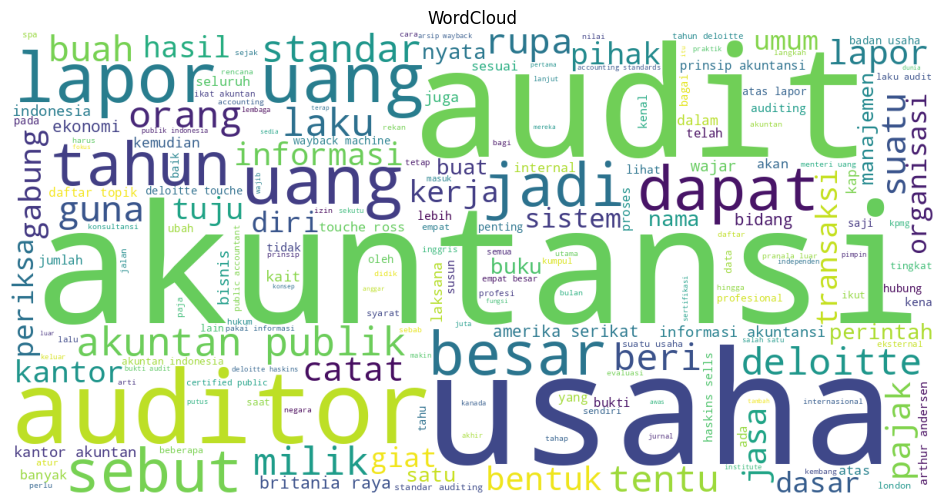

In [ ]:
# === WordCloud ===
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df_preprocessed["text_clean"].tolist())

wc = WordCloud(width=1200, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis("off")
plt.title("WordCloud")
plt.show()


**Interpretasi**

Wordcloud tersebut memperlihatkan kata yang paling sering muncul setelah teks dibersihkan dengan Sastrawi (stopwords dihapus dan kata distem). Ukuran kata yang besar seperti **“audit”**, **“akuntansi”**, dan **“usaha”** menandakan tiga tema utama korpus. Kata lain yang juga menonjol seperti **“auditor”**, **“lapor”** (bentuk dasar dari *laporan/melaporkan*), **“uang”**, **“transaksi”**, **“pajak”**, **“publik”**, **“catat”**, **“standar”**, dan **“tahun”**, menguatkan bahwa isi dokumen berfokus pada proses audit, pelaporan, serta konteks keuangan. Secara keseluruhan, visual ini menegaskan korpus bertema audit/akuntansi dengan kombinasi kata proses/prosedur (audit, lapor), objek finansial (uang, transaksi, pajak), dan entitas lembaga/firma (auditor, publik, deloitte).


## **Most common word barplot**

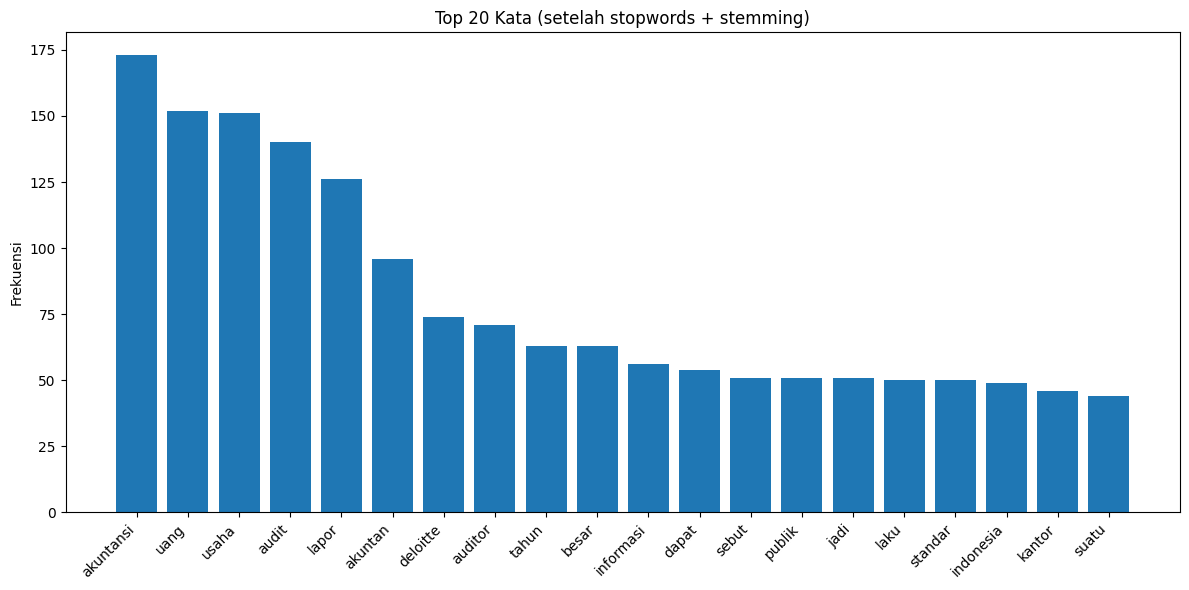

In [ ]:
# === Most Common Word Barplot (Top-N) ===
from collections import Counter
import itertools
import matplotlib.pyplot as plt

TOP_N = 20  # ubah jika ingin lebih/kurang

all_tokens = list(itertools.chain.from_iterable(df_preprocessed["tokens"].tolist()))
freq = Counter(all_tokens)
top_words = freq.most_common(TOP_N)

words, counts = zip(*top_words) if top_words else ([], [])

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frekuensi")
plt.title(f"Top {TOP_N} Kata (setelah stopwords + stemming)")
plt.tight_layout()
plt.show()

**Interpretasi**

Barplot top-20 menunjukkan dominasi kata **“akuntansi”**, **“uang”**, **“usaha”**, dan **“audit”**, sehingga tema korpus jelas seputar akuntansi dan proses audit. Di bawahnya, **“lapor”**, **“akuntan”**, **“auditor”**, **“tahun”**, dan **“deloitte”** menguatkan konteks pelaporan/keprofesian serta keberadaan topik **Big Four**. Kata lain seperti **“besar”**, **“informasi”**, **“publik”**, **“standar”**, **“indonesia”**, dan **“kantor”** muncul dengan frekuensi sedang namun tetap relevan. Secara ringkas, kosakata korpus didominasi istilah akuntansi–audit dengan sorotan khusus pada **Deloitte/Big Four**.

# **6) Clustering menggunakan fitur TF-IDF**

In [ ]:
# === TF-IDF + KMeans Clustering ===
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

In [ ]:
# Pakai teks yang sudah dibersihkan (stopwords + stemming Sastrawi)
texts = df_preprocessed["text_clean"].tolist()

# TF-IDF
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_df=0.85,
    min_df=3,
    max_features=50000
)
X = vectorizer.fit_transform(texts)
print("TF-IDF shape:", X.shape)

TF-IDF shape: (10, 388)


In [ ]:
# Cari k terbaik (berdasarkan silhouette)
K_RANGE = range(3, 10)
scores = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels_k = km.fit_predict(X)
    sil = silhouette_score(X, labels_k) if len(set(labels_k)) > 1 else -1
    scores.append((k, sil))

print("Silhouette per k:", scores)
best_k = max(scores, key=lambda t: t[1])[0]
print("Best k (silhouette):", best_k)

Silhouette per k: [(3, np.float64(0.12841945632641166)), (4, np.float64(0.12942832318815461)), (5, np.float64(0.12560120488251092)), (6, np.float64(0.12598197218758883)), (7, np.float64(0.08460082475706322)), (8, np.float64(0.05634621580430762)), (9, np.float64(0.034345103272081956))]
Best k (silhouette): 4


In [ ]:
# Fit final model
km = KMeans(n_clusters=best_k, random_state=42, n_init=50)
labels = km.fit_predict(X)

In [ ]:
# Simpan hasil
df_clusters = df_preprocessed.copy()
df_clusters["cluster"] = labels

In [ ]:
# Tampilkan jumlah dokumen per cluster
print("\nCounts per cluster:")
print(df_clusters["cluster"].value_counts().sort_index())


Counts per cluster:
cluster
0    5
1    2
2    2
3    1
Name: count, dtype: int64


In [ ]:
# Top terms per cluster (berdasarkan centroid TF-IDF)
feature_names = np.array(vectorizer.get_feature_names_out())
TOP_N = 12
for c in range(best_k):
    idx = np.where(labels == c)[0]
    centroid = X[idx].mean(axis=0)
    centroid = np.asarray(centroid).ravel()
    top_idx = centroid.argsort()[::-1][:TOP_N]
    terms = feature_names[top_idx].tolist()
    print(f"\nCluster {c} — top terms: {', '.join(terms)}")


Cluster 0 — top terms: usaha, auditor, informasi, lapor uang, tentu, akuntan publik, orang, bidang, suatu, periksa, milik, bukti

Cluster 1 — top terms: standar, lapor uang, nyata, indonesia, standar auditing, jasa, auditing, atestasi, atas, auditor, tentu, jasa akuntansi

Cluster 2 — top terms: deloitte, besar, touche, tahun, gabung, arthur, kantor, andersen, arthur andersen, empat, usaha, jadi

Cluster 3 — top terms: akuntan indonesia, indonesia, ikat akuntan, ikat, susun, profesi, organisasi, standar, sertifikasi, situs, profesi akuntan, resmi


In [ ]:
# (Opsional) contoh judul dokumen per cluster
SAMPLES = 3
for c in range(best_k):
    subset = df_clusters[df_clusters["cluster"] == c].head(SAMPLES)
    print(f"\n=== Cluster {c} — sample titles ===")
    for _, row in subset.iterrows():
        print("-", row["title"])


=== Cluster 0 — sample titles ===
- Akuntan
- Bukti audit
- Kantor Akuntan Publik

=== Cluster 1 — sample titles ===
- Standar Auditing
- Standar Jasa Akuntansi dan Review

=== Cluster 2 — sample titles ===
- Deloitte
- the Big Four auditors

=== Cluster 3 — sample titles ===
- Ikatan Akuntan Indonesia


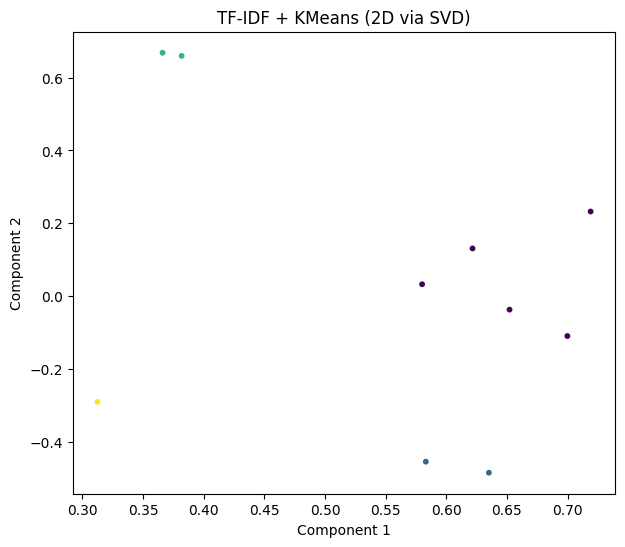

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd2 = TruncatedSVD(n_components=2, random_state=42)
X2 = svd2.fit_transform(X)

plt.figure(figsize=(7,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=10)
plt.title("TF-IDF + KMeans (2D via SVD)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


TF-IDF shape: (10, 6895)
LSA shape: (10, 10)


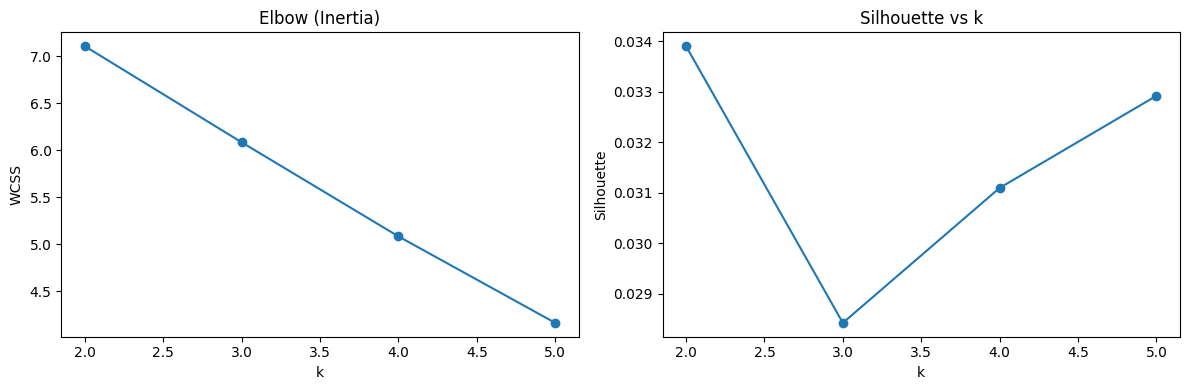

Best k (silhouette): 2

Jumlah dokumen per cluster:
cluster
0    8
1    2
Name: count, dtype: int64

Cluster 0 — top terms: indonesia, standar, uang, lapor, lapor uang, nyata, ikat, susun, audit, akuntan indonesia, atas, dapat

Cluster 1 — top terms: deloitte, touche, raya, britania, britania raya, ross, haskins, sells, touche ross, haskins sells, gabung, arthur

=== Cluster 0 — sample titles ===
- Akuntan
- Bukti audit
- Ikatan Akuntan Indonesia

=== Cluster 1 — sample titles ===
- Deloitte
- the Big Four auditors


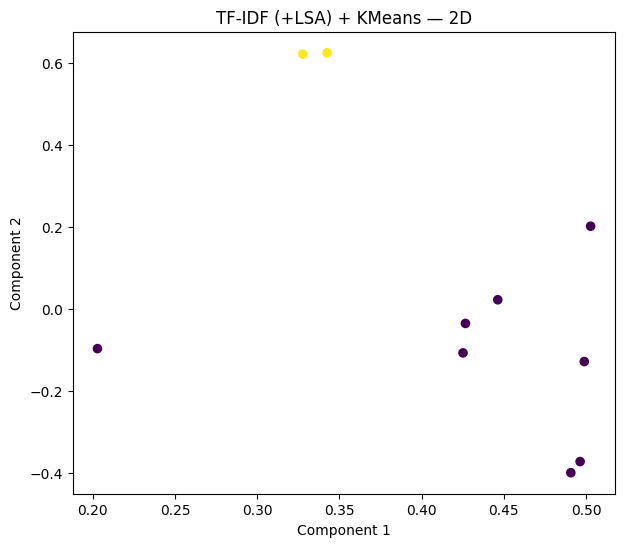

In [ ]:
# === TF-IDF + (opsional) LSA + KMeans + Elbow & Silhouette ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1) TF-IDF dari teks yang sudah dibersihkan (Sastrawi)
texts = df_preprocessed["text_clean"].tolist()
titles = df_preprocessed["title"].tolist()

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    max_df=0.98,
    min_df=1,
    sublinear_tf=True
)
X = vectorizer.fit_transform(texts)
print("TF-IDF shape:", X.shape)

# 2) (Opsional) LSA agar lebih stabil pada data kecil
APPLY_LSA = True
if APPLY_LSA and X.shape[1] > 2:
    n_comp = min(100, X.shape[1]-1)
    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    X_feat = Normalizer(copy=False).fit_transform(svd.fit_transform(X))
    print("LSA shape:", X_feat.shape)
else:
    X_feat = X

# 3) Elbow (Inertia) & Silhouette untuk memilih k
K_RANGE = range(2, 6)  # data kecil → k kecil lebih masuk akal
inertias, sils = [], []
for k in K_RANGE:
    km = KMeans(n_clusters=k, init="k-means++", n_init=50, random_state=42)
    labels_k = km.fit_predict(X_feat)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_feat, labels_k))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(K_RANGE), inertias, marker="o"); plt.title("Elbow (Inertia)"); plt.xlabel("k"); plt.ylabel("WCSS")
plt.subplot(1,2,2)
plt.plot(list(K_RANGE), sils, marker="o"); plt.title("Silhouette vs k"); plt.xlabel("k"); plt.ylabel("Silhouette")
plt.tight_layout(); plt.show()

best_k = K_RANGE[int(np.argmax(sils))]
print("Best k (silhouette):", best_k)

# 4) Fit model final & simpan hasil
km = KMeans(n_clusters=best_k, init="k-means++", n_init=100, random_state=42)
labels = km.fit_predict(X_feat)

df_clusters = df_preprocessed.copy()
df_clusters["cluster"] = labels

print("\nJumlah dokumen per cluster:")
print(df_clusters["cluster"].value_counts().sort_index())

# 5) Top terms per cluster
feature_names = np.array(vectorizer.get_feature_names_out())
TOP_N = 12
for c in range(best_k):
    idx = np.where(labels == c)[0]
    if len(idx) == 0:
        print(f"\nCluster {c} kosong."); continue
    centroid = np.asarray(X[idx].mean(axis=0)).ravel()
    top_idx = centroid.argsort()[::-1][:TOP_N]
    terms = feature_names[top_idx].tolist()
    print(f"\nCluster {c} — top terms: {', '.join(terms)}")

# 6) Contoh judul dokumen per cluster
SAMPLES = 3
for c in range(best_k):
    print(f"\n=== Cluster {c} — sample titles ===")
    for t in df_clusters[df_clusters["cluster"] == c]["title"].head(SAMPLES):
        print("-", t)

# 7) Visualisasi 2D
svd2 = TruncatedSVD(n_components=2, random_state=42)
X2 = svd2.fit_transform(X_feat if hasattr(X_feat, "shape") else X)
plt.figure(figsize=(7,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=35)
plt.title("TF-IDF (+LSA) + KMeans — 2D")
plt.xlabel("Component 1"); plt.ylabel("Component 2")
plt.show()


**Interpretasi Shape TF-IDF**

**TF-IDF shape (10, 6895)** artinya ada **10 dokumen** dengan **6.895 fitur** (uni- dan bigram, karena `ngram_range=(1,2)`; `max_df=0.98` & `min_df=1` membuat hampir semua istilah ikut, jadi fiturnya banyak). **LSA shape (10, 10)** berarti fitur TF-IDF dipadatkan jadi **10 komponen laten**, sehingga dimensi turun, noise berkurang, dan hasil **clustering** biasanya lebih stabil serta mudah dibaca.

**Interpretasi Pemilihan Nilai K**

Grafik pemilihan **k** menunjukkan dua hal. Pertama, pada plot **Elbow (WCSS)** garis turun hampir linier dari k=2 sampai k=5, sehingga tidak ada “siku” yang jelas, artinya elbow kurang informatif untuk data ini. Kedua, pada plot **Silhouette**, nilai tertinggi terjadi di **k=2** (\~0,034), turun tajam di k=3, lalu naik sedikit di k=4–5 namun tetap di bawah k=2. Dengan demikian, **k terbaik = 2**.

**Interpretasi Top Terms Cluster**

Top terms menegaskan tema tiap klaster. **Cluster 0** berisi topik **regulasi dan pelaporan di Indonesia**—terlihat dari kata **“standar”**, **“lapor/lapor uang”**, **“audit”**, dan frasa **“akuntan indonesia”**; bentuk seperti **“ikat”** dan **“susun”** muncul karena stemming. **Cluster 1** fokus pada **firma Big Four** dan asal-usulnya, ditandai nama **“deloitte”**, **“touche”**, **“ross”**, **“haskins/sells”**, **“arthur”**, serta **“britania raya”**. Ringkasnya, klaster 0 = **regulasi/standar domestik**, klaster 1 = **entitas audit global**.

**Interpretasi Judul tiap Cluster**

Contoh judul memperkuat makna tiap klaster. **Cluster 0** berisi topik **konseptual dan kelembagaan di Indonesia**—terlihat dari *Akuntan*, *Bukti audit*, dan *Ikatan Akuntan Indonesia*. Sementara **Cluster 1** memuat **entitas/firma global**—*Deloitte* dan *the Big Four auditors*. Jadi, pemisahannya jelas: klaster 0 fokus pada **peran, praktik, dan organisasi domestik**, klaster 1 pada **perusahaan audit internasional (Big Four)**.

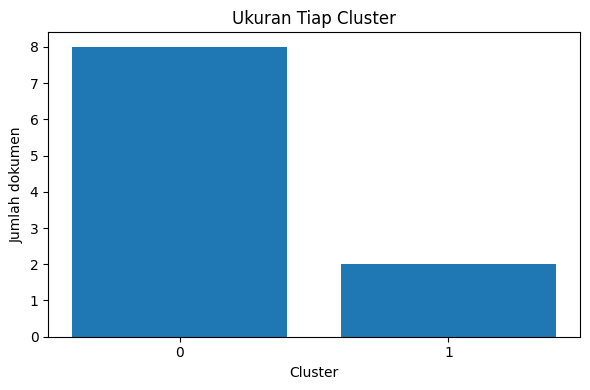

In [ ]:
 === Visual 1 — Ukuran Tiap Cluster (barplot) ===
import matplotlib.pyplot as plt
import numpy as np

counts = df_clusters["cluster"].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Cluster")
plt.ylabel("Jumlah dokumen")
plt.title("Ukuran Tiap Cluster")
plt.tight_layout()
plt.show()


# **7) Visualisasi Cluster**

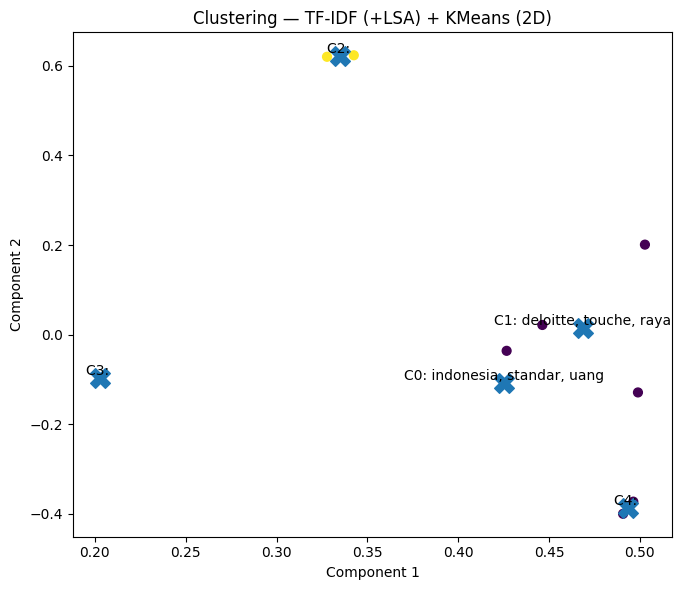

In [ ]:
# === Visual 2 — Scatter 2D + Centroid + Label Top Terms ===
# Pakai X2 (2D) dari langkah sebelumnya; kalau belum ada, bikin sekarang
from sklearn.decomposition import TruncatedSVD

if "X2" not in globals():
    svd2 = TruncatedSVD(n_components=2, random_state=42)
    X2 = svd2.fit_transform(X_feat)

# Proyeksikan centroid KMeans ke ruang 2D yang sama
centers_2d = svd2.transform(km.cluster_centers_)

# Fungsi top terms untuk anotasi centroid
import numpy as np
feature_names = np.array(vectorizer.get_feature_names_out())
def top_terms(c, n=3):
    idx = np.where(labels == c)[0]
    if len(idx) == 0:
        return ""
    centroid = np.asarray(X[idx].mean(axis=0)).ravel()
    top_idx = centroid.argsort()[::-1][:n]
    return ", ".join(feature_names[top_idx])

plt.figure(figsize=(7,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=40)
plt.scatter(centers_2d[:,0], centers_2d[:,1], s=200, marker="X")  # centroid

# Anotasi ID cluster + 3 kata kunci di dekat centroid
for c, (cx, cy) in enumerate(centers_2d):
    plt.text(cx, cy, f"C{c}: {top_terms(c,3)}", ha="center", va="bottom")

plt.title("Clustering — TF-IDF (+LSA) + KMeans (2D)")
plt.xlabel("Component 1"); plt.ylabel("Component 2")
plt.tight_layout()
plt.show()


**Interpretasi**

Visual 2D ini memperlihatkan K-Means (k=2) setelah LSA. Titik = dokumen, X = centroid (dengan 3 kata kunci). Terbentuk dua grup: C0 (kata kunci indonesia, standar, uang → tema regulasi/pelaporan) dan C1 (deloitte, touche, raya → tema firma Big Four). Mayoritas dokumen mengelompok di C0, sebagian kecil di C1

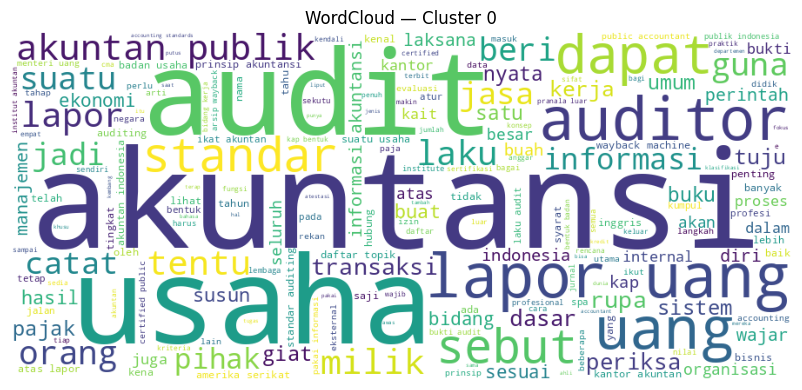

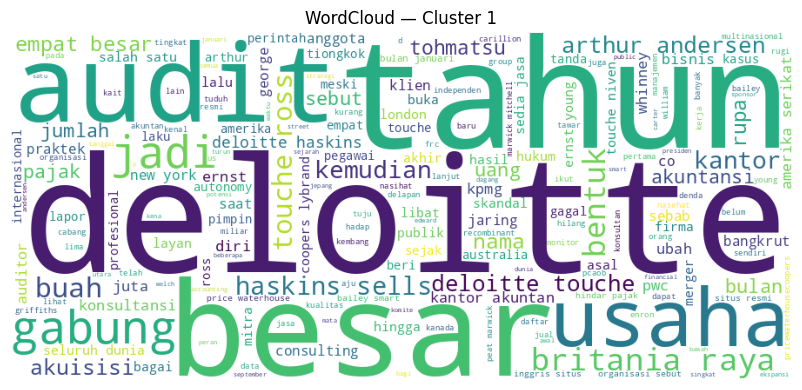

In [ ]:
# === Visual 3 — Wordcloud per Cluster (opsional tapi cakep buat laporan) ===
from wordcloud import WordCloud

for c in sorted(df_clusters["cluster"].unique()):
    text_c = " ".join(df_clusters[df_clusters["cluster"] == c]["text_clean"])
    if not text_c.strip():
        continue
    wc = WordCloud(width=900, height=400, background_color="white").generate(text_c)
    plt.figure(figsize=(9,4))
    plt.imshow(wc); plt.axis("off")
    plt.title(f"WordCloud — Cluster {c}")
    plt.tight_layout()
    plt.show()


**Interpretasi**

Wordcloud per klaster ini menegaskan tema masing-masing kelompok.
**Cluster 0** didominasi istilah proses dan regulasi akuntansi di Indonesia: kata besar seperti **akuntansi**, **audit**, **usaha**, **standar**, **lapor** (hasil stemming dari *laporan/melaporkan*), **uang**, **auditor**, hingga **akuntan publik**. Ini mencerminkan fokus pada praktik, pelaporan keuangan, dan peran kelembagaan/domestik.

Sebaliknya, **Cluster 1** menonjolkan entitas dan sejarah **Big Four**: **deloitte**, **touche**, **haskins**/**sells**, **arthur**/**andersen**, serta konteks wilayah seperti **britania raya**; kata **tahun**, **gabung**, **besar** juga sering muncul yang mengarah ke linimasa merger/pertumbuhan firma. Secara ringkas: klaster 0 = praktik/regulasi akuntansi; klaster 1 = firma audit global (Big Four) dan sejarahnya.


# **8) validasi menggunakan salah satu Davies-Bouldin index atau Silhouette score**

In [ ]:
# === Validasi Klaster: Silhouette & Davies–Bouldin ===
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Skor pada model final (labels & X_feat yang sudah kamu buat di atas)
sil_final = silhouette_score(X_feat, labels)
db_final  = davies_bouldin_score(X_feat, labels)

print(f"Silhouette score (↑ lebih baik): {sil_final:.4f}")
print(f"Davies–Bouldin index (↓ lebih baik): {db_final:.4f}")


Silhouette score (↑ lebih baik): 0.0339
Davies–Bouldin index (↓ lebih baik): 1.8213


**Interpretasi**

Skor validasi menunjukkan klaster **belum kuat**. Nilai **Silhouette = 0,0339** (mendekati 0) artinya pemisahan antar klaster **sangat lemah**, rata-rata dokumen hanya sedikit lebih dekat ke klasternya dibanding ke klaster lain. Indeks **Davies–Bouldin = 1,82** (semakin kecil semakin baik) masih **cukup tinggi**, menandakan **kekompakan klaster rendah** dan **tumpang tindih** antar klaster. Hasil ini wajar mengingat jumlah dokumen **sedikit (10)** dan topiknya **berdekatan**, jadi klaster terbentuk, tapi batasnya belum kuat.

In [ ]:
# === Rekap validasi untuk semua k yang diuji ===
vals = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, init="k-means++", n_init=50, random_state=42)
    lab = km.fit_predict(X_feat)
    sil = silhouette_score(X_feat, lab)
    db  = davies_bouldin_score(X_feat, lab)
    vals.append((k, sil, db))

import pandas as pd
df_valid = pd.DataFrame(vals, columns=["k", "silhouette", "davies_bouldin"])
print(df_valid.to_string(index=False))


 k  silhouette  davies_bouldin
 2    0.033902        1.821330
 3    0.028420        2.050630
 4    0.031095        1.592242
 5    0.032919        1.264785
